In [1]:
#importing necessary libraries
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.gofplots import qqplot
from arch import arch_model
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


ModuleNotFoundError: No module named 'pandas'

In [134]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 7.6 MB/s eta 0:00:00


In [9]:
data = pd.read_csv('/content/AAPL.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-28,71.269997,71.457497,69.550003,69.644997,69.109299,112004800
1,2020-04-29,71.182503,72.417503,70.972504,71.932503,71.379196,137280800
2,2020-04-30,72.489998,73.632500,72.087502,73.449997,72.885025,183064000
3,2020-05-01,71.562500,74.750000,71.462502,72.267502,71.711632,240616800
4,2020-05-04,72.292503,73.422501,71.580002,73.290001,72.726265,133568000
...,...,...,...,...,...,...,...
248,2021-04-22,133.039993,134.149994,131.410004,131.940002,131.940002,84566500
249,2021-04-23,132.160004,135.119995,132.160004,134.320007,134.320007,78657500
250,2021-04-26,134.830002,135.059998,133.559998,134.720001,134.720001,66905100
251,2021-04-27,135.009995,135.410004,134.110001,134.389999,134.389999,65752700


In [10]:
data.shape

(253, 7)

In [11]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
248    False
249    False
250    False
251    False
252    False
Length: 253, dtype: bool

In [13]:
data.duplicated().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [15]:
data.nunique()

Date         253
Open         247
High         244
Low          246
Close        250
Adj Close    251
Volume       253
dtype: int64

In [16]:
df = data.copy()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-28,71.269997,71.457497,69.550003,69.644997,69.109299,112004800
1,2020-04-29,71.182503,72.417503,70.972504,71.932503,71.379196,137280800
2,2020-04-30,72.489998,73.632500,72.087502,73.449997,72.885025,183064000
3,2020-05-01,71.562500,74.750000,71.462502,72.267502,71.711632,240616800
4,2020-05-04,72.292503,73.422501,71.580002,73.290001,72.726265,133568000
...,...,...,...,...,...,...,...
248,2021-04-22,133.039993,134.149994,131.410004,131.940002,131.940002,84566500
249,2021-04-23,132.160004,135.119995,132.160004,134.320007,134.320007,78657500
250,2021-04-26,134.830002,135.059998,133.559998,134.720001,134.720001,66905100
251,2021-04-27,135.009995,135.410004,134.110001,134.389999,134.389999,65752700


In [17]:
corr= data.corr()
corr

<ipython-input-17-fccbe072e573>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= data.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.997915,0.996532,0.994300,0.994303,-0.209553
High,0.997915,1.000000,0.996292,0.997122,0.997051,-0.190200
Low,0.996532,0.996292,1.000000,0.997158,0.997243,-0.246936
Close,0.994300,0.997122,0.997158,1.000000,0.999977,-0.220476
Adj Close,0.994303,0.997051,0.997243,0.999977,1.000000,-0.223351
Volume,-0.209553,-0.190200,-0.246936,-0.220476,-0.223351,1.000000


<Axes: >

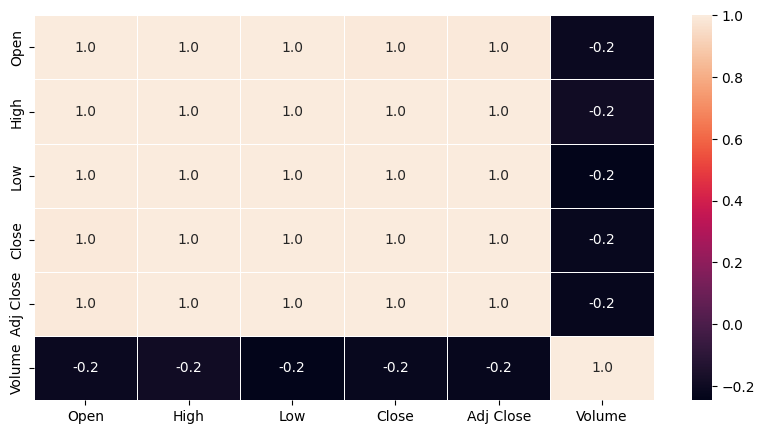

In [18]:
f,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

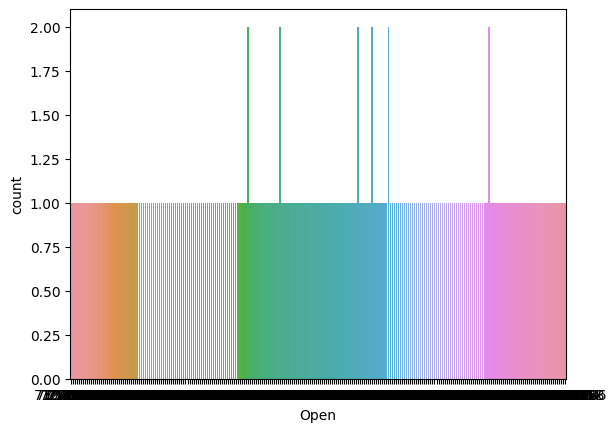

<Figure size 2000x2000 with 0 Axes>

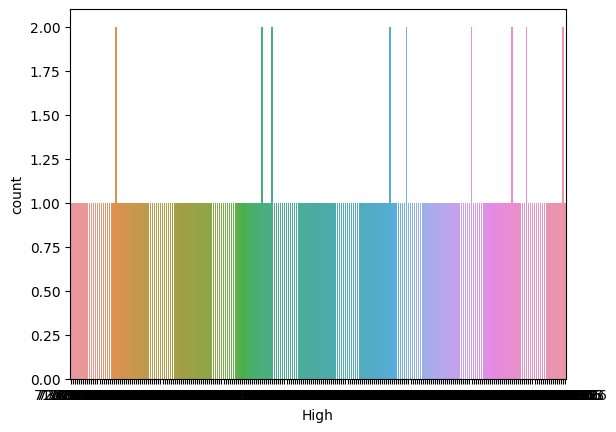

<Figure size 2000x2000 with 0 Axes>

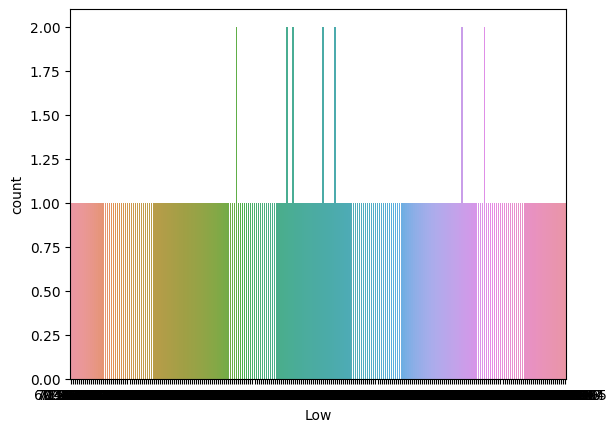

<Figure size 2000x2000 with 0 Axes>

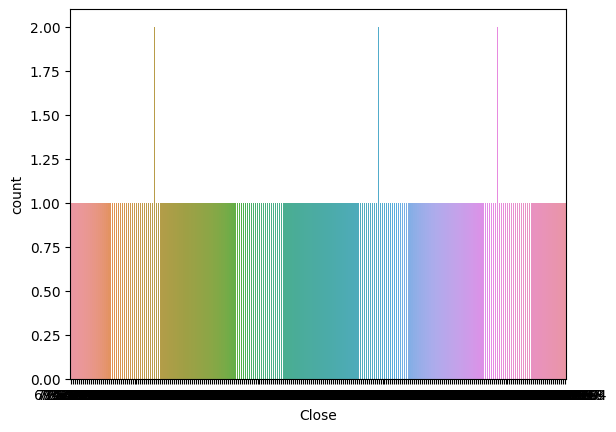

<Figure size 2000x2000 with 0 Axes>

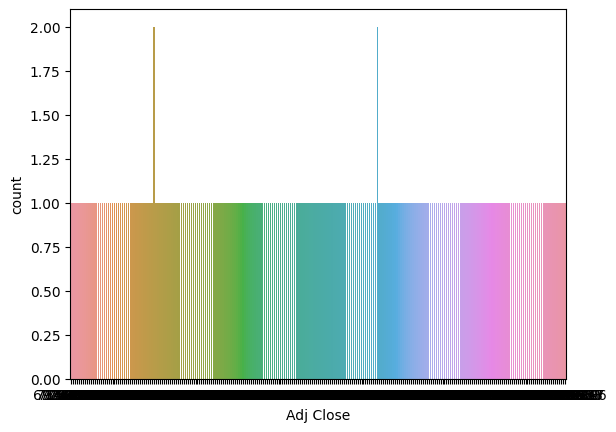

<Figure size 2000x2000 with 0 Axes>

In [19]:
for i in df.loc[:, ~df.columns.isin(["Date", "Volume"])]:
    f = sns.countplot(x=df[i]);
    plt.figure(figsize=(20,20))
    plt.show()

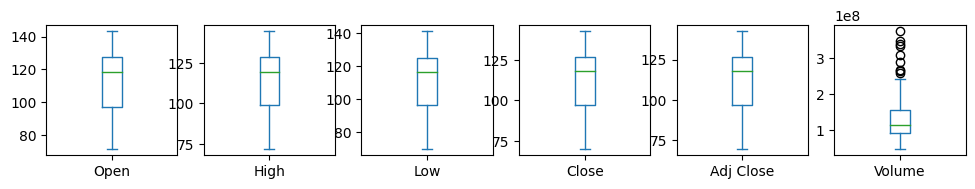

In [20]:
df.plot(kind='box',subplots=True,layout=(10,10),figsize=(20,20))
plt.show()

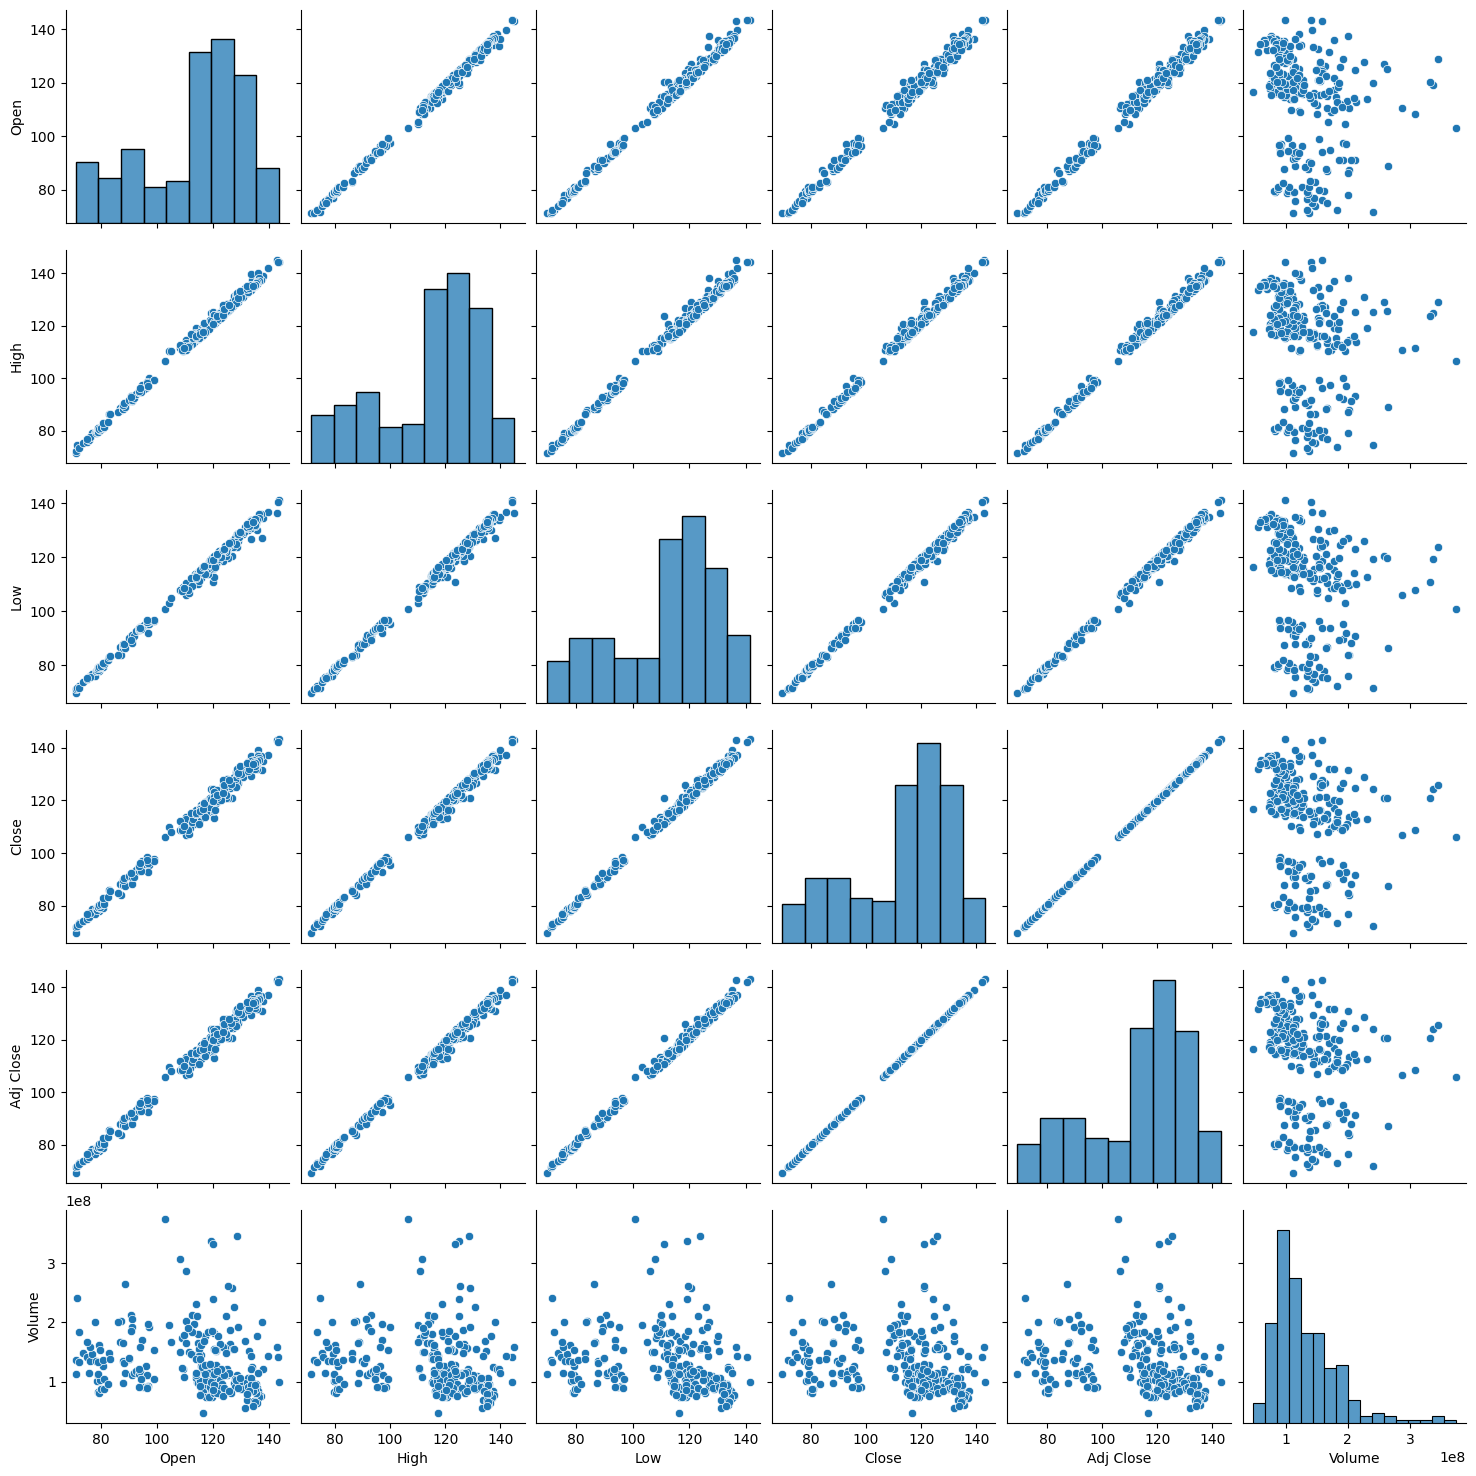

In [21]:
sns.pairplot(df)

In [22]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.shape, test_data.shape

((202, 7), (51, 7))

In [23]:
length_data = len(data)     # rows that data has
train_size = 0.67           # %67 train + %33 validation
length_train = round(length_data * train_size)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 253
Train data length : 170
Validation data lenth : 83


In [24]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2020-04-28,71.269997
1,2020-04-29,71.182503
2,2020-04-30,72.489998
3,2020-05-01,71.562500
4,2020-05-04,72.292503
...,...,...
165,2020-12-21,125.019997
166,2020-12-22,131.610001
167,2020-12-23,132.160004
168,2020-12-24,131.320007


In [25]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
170,2020-12-29,138.050003
171,2020-12-30,135.580002
172,2020-12-31,134.080002
173,2021-01-04,133.520004
174,2021-01-05,128.889999
...,...,...
248,2021-04-22,133.039993
249,2021-04-23,132.160004
250,2021-04-26,134.830002
251,2021-04-27,135.009995


In [26]:
data_train = train_data.Open.values
data_train.shape

(170,)

In [27]:
data_train = np.reshape(data_train, (-1,1))
data_train.shape

(170, 1)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
data_train_scaled = scaler.fit_transform(data_train)

data_train_scaled.shape

(170, 1)

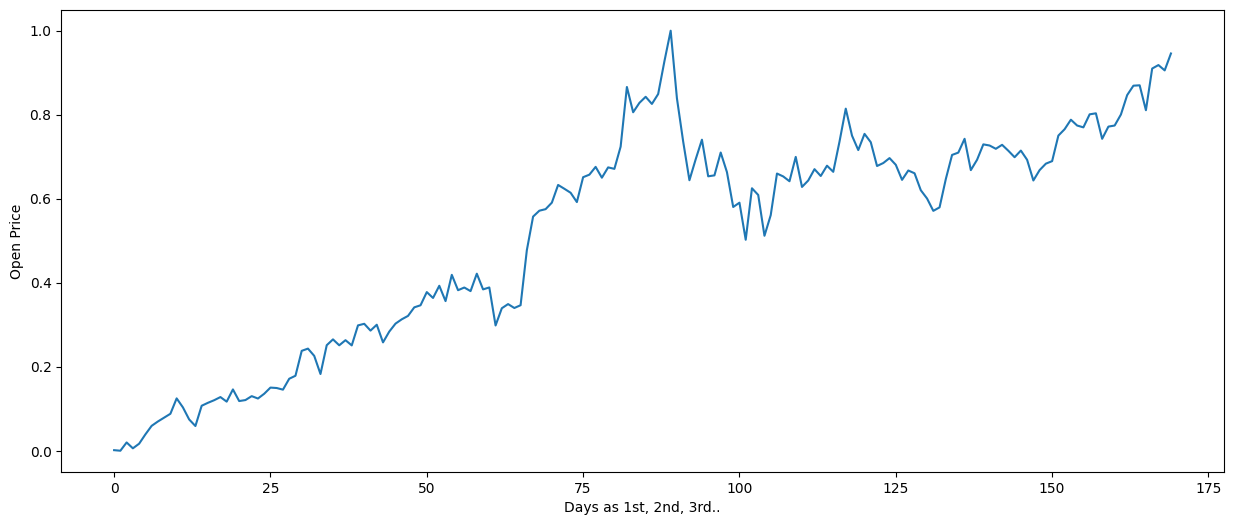

In [29]:
plt.subplots(figsize = (15,6))
plt.plot(data_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [30]:
X_train = []
y_train = []

pred_days = 20

for i in range(pred_days, length_train):
    X_train.append(data_train_scaled[i-pred_days:i,0])
    y_train.append(data_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [31]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (150, 20)
Shape of y_train before reshape : (150,)


In [32]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (150, 20, 1)
Shape of y_train after reshape : (150, 1)


In [33]:
X_train[0]

array([[0.00131753],
       [0.        ],
       [0.01968897],
       [0.0057222 ],
       [0.01671498],
       [0.03888862],
       [0.05921764],
       [0.06960806],
       [0.07871854],
       [0.08797951],
       [0.12460934],
       [0.10322623],
       [0.07446447],
       [0.05880359],
       [0.10706623],
       [0.11406841],
       [0.12028003],
       [0.12773405],
       [0.11685419],
       [0.14595487]])

In [34]:
y_train[0]

array([0.11824721])

In [35]:
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 20,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )

In [36]:
regressor.add(
    SimpleRNN(units = 20,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

In [37]:
regressor.add(
    SimpleRNN(units = 20,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )


In [38]:
regressor.add(
    SimpleRNN(units = 20)
             )

regressor.add(
    Dropout(0.2)
             )


In [39]:
regressor.add(Dense(units = 1))


In [40]:
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

In [41]:
history = regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
5/5 [==============================] - 3s 18ms/step - loss: 0.4927 - accuracy: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 0s 16ms/step - loss: 0.4459 - accuracy: 0.0067
Epoch 3/20
5/5 [==============================] - 0s 17ms/step - loss: 0.3321 - accuracy: 0.0067
Epoch 4/20
5/5 [==============================] - 0s 16ms/step - loss: 0.3268 - accuracy: 0.0067
Epoch 5/20
5/5 [==============================] - 0s 15ms/step - loss: 0.3235 - accuracy: 0.0067
Epoch 6/20
5/5 [==============================] - 0s 17ms/step - loss: 0.3451 - accuracy: 0.0000e+00
Epoch 7/20
5/5 [==============================] - 0s 17ms/step - loss: 0.3308 - accuracy: 0.0000e+00
Epoch 8/20
5/5 [==============================] - 0s 29ms/step - loss: 0.2783 - accuracy: 0.0000e+00
Epoch 9/20
5/5 [==============================] - 0s 26ms/step - loss: 0.2834 - accuracy: 0.0067
Epoch 10/20
5/5 [==============================] - 0s 29ms/step - loss: 0.2138 - accuracy: 0.0067
Epoch 11/20
5

In [42]:
history.history["loss"]

[0.49274057149887085,
 0.4459322690963745,
 0.33206939697265625,
 0.3268428146839142,
 0.32346296310424805,
 0.34505969285964966,
 0.3307664394378662,
 0.2783470153808594,
 0.2833864092826843,
 0.21375592052936554,
 0.22719769179821014,
 0.21425719559192657,
 0.1942829191684723,
 0.17043490707874298,
 0.1850220412015915,
 0.14764365553855896,
 0.15733946859836578,
 0.1742980182170868,
 0.16352365911006927,
 0.15300516784191132]

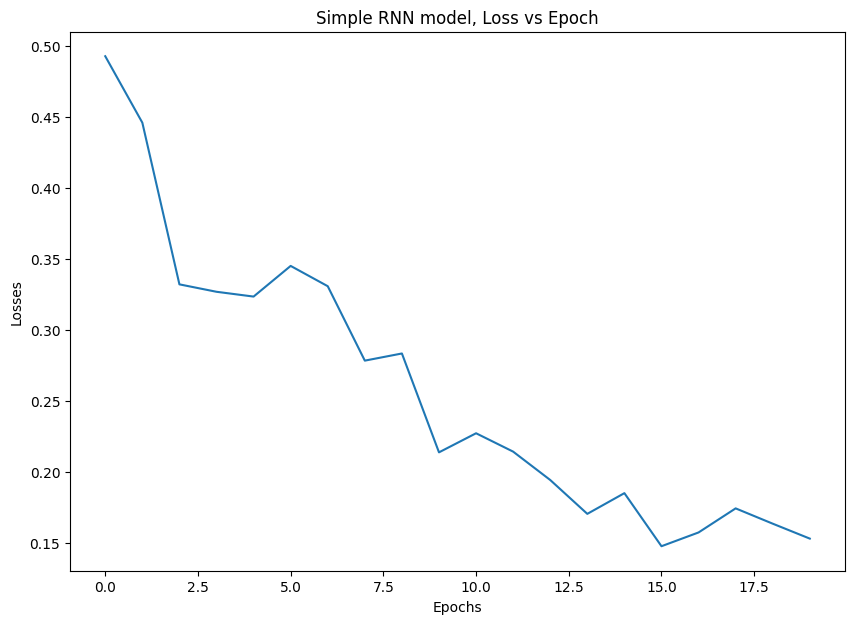

In [43]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

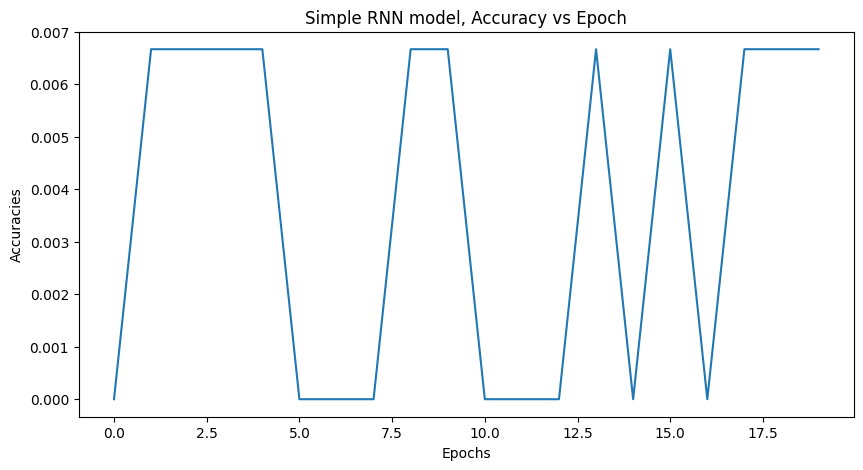

In [44]:
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [45]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

5/5 [==============================] - 1s 8ms/step


(150, 1)

In [46]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(150, 1)

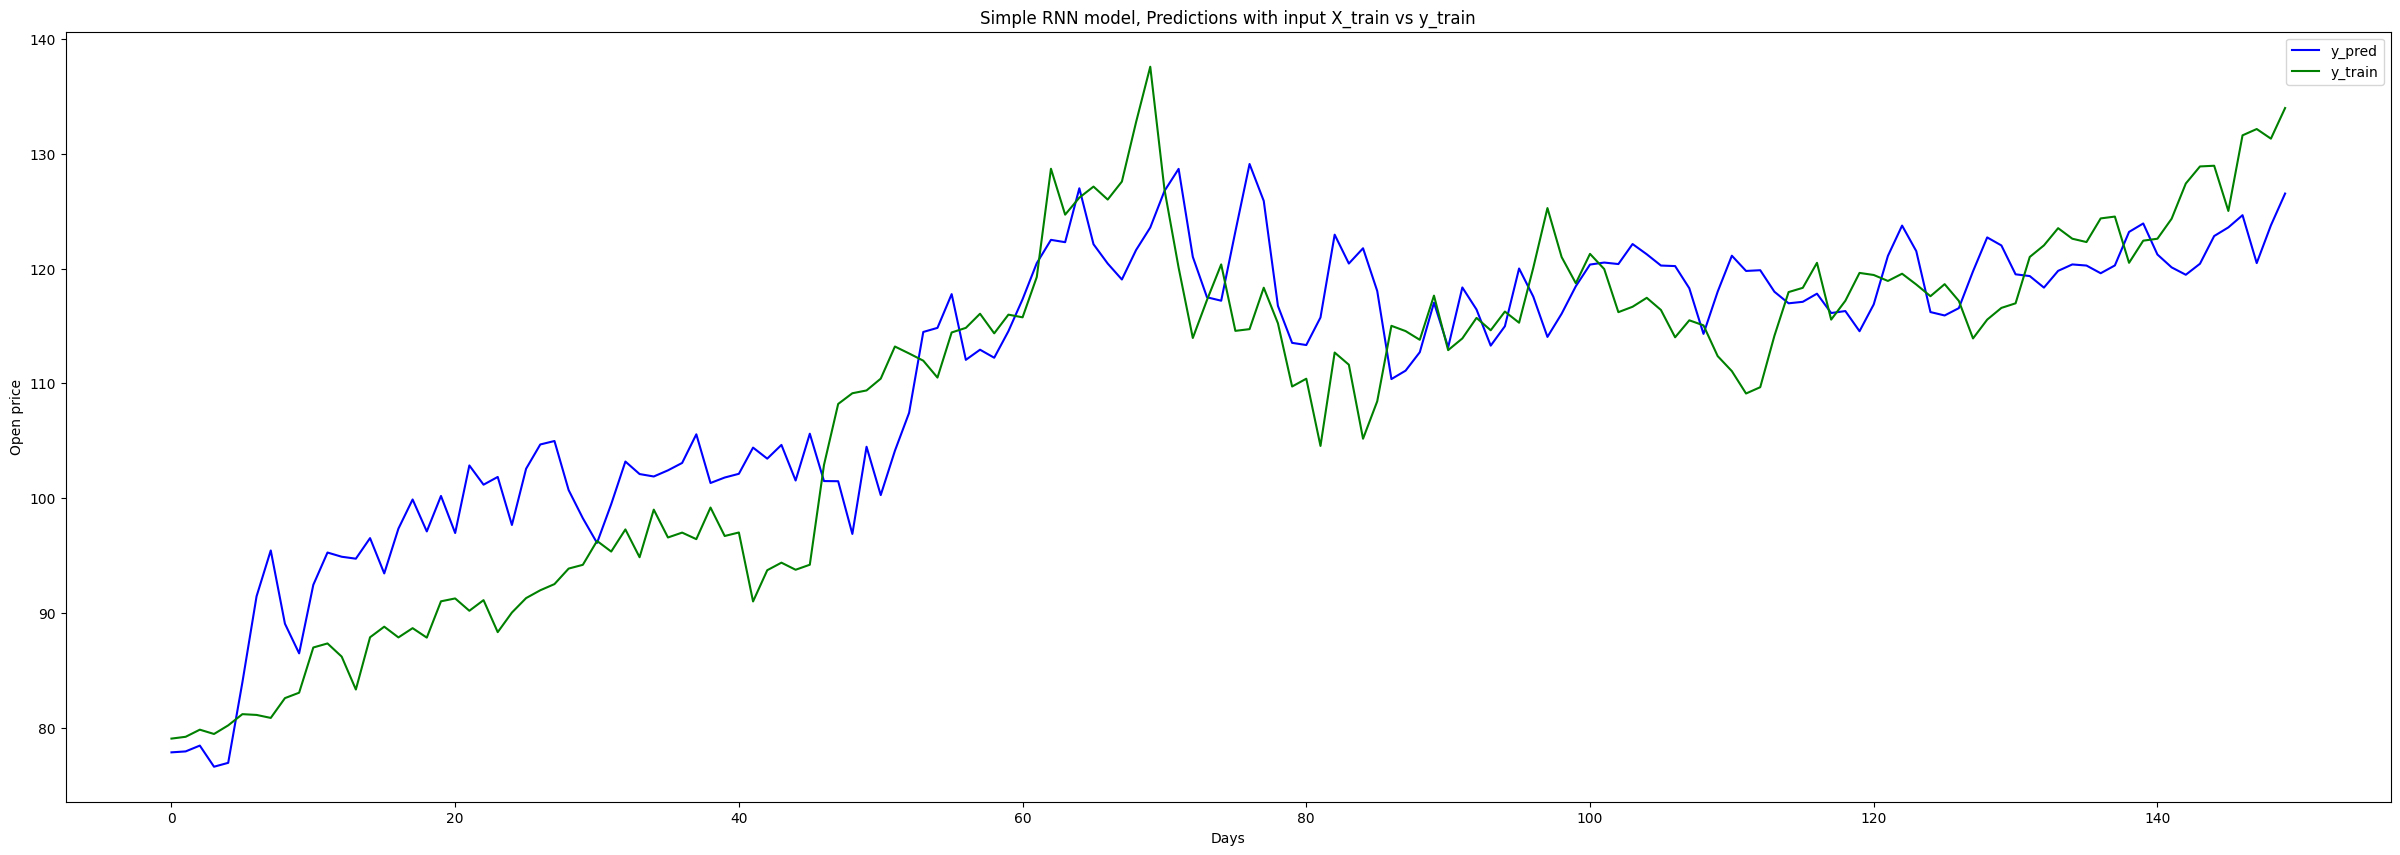

In [47]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [48]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (83, 1)


In [49]:
X_test = []
y_test = []

for i in range(pred_days, length_validation):
    X_test.append(scaled_dataset_validation[i-pred_days:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [50]:
X_test, y_test = np.array(X_test), np.array(y_test)
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (63, 20)
Shape of y_test before reshape : (63,)


In [51]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (63, 20, 1)
Shape of y_test after reshape : (63, 1)


In [52]:
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

2/2 [==============================] - 0s 8ms/step
Shape of y_pred_of_test : (63, 1)


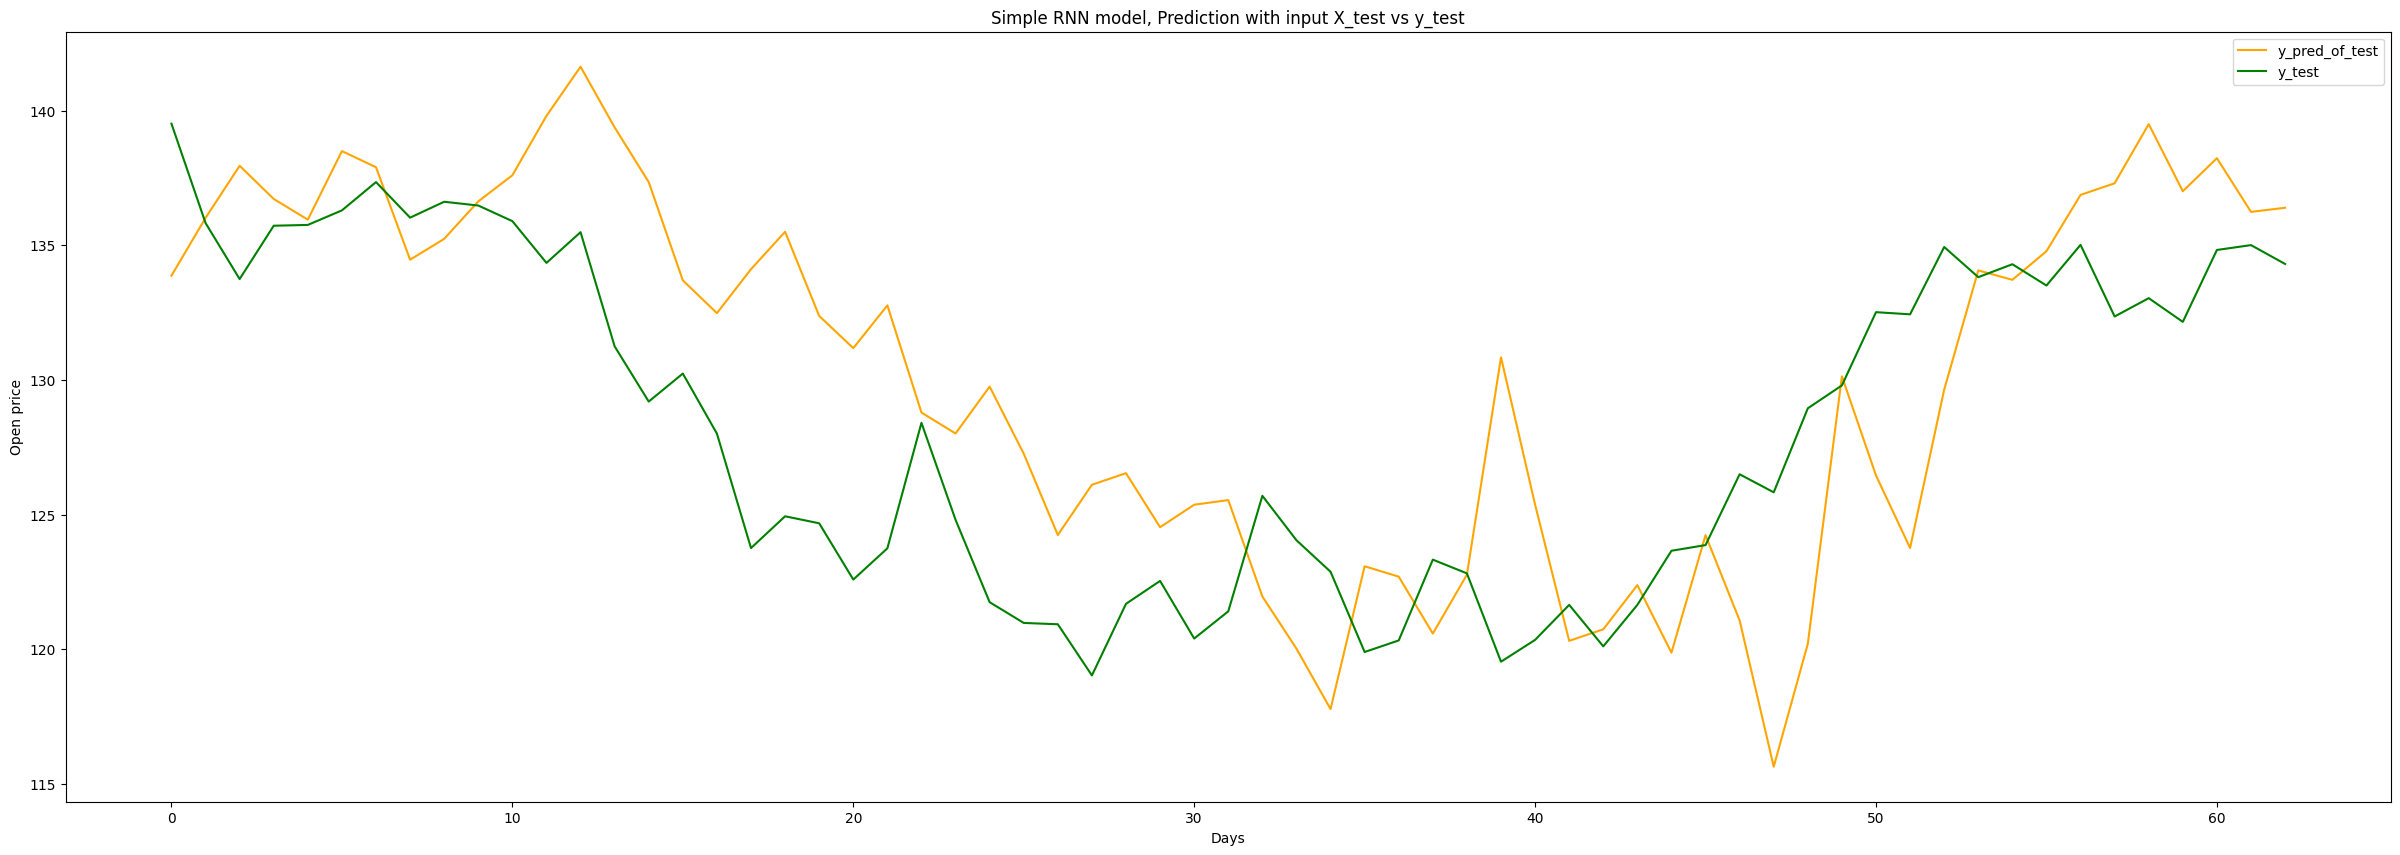

In [53]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

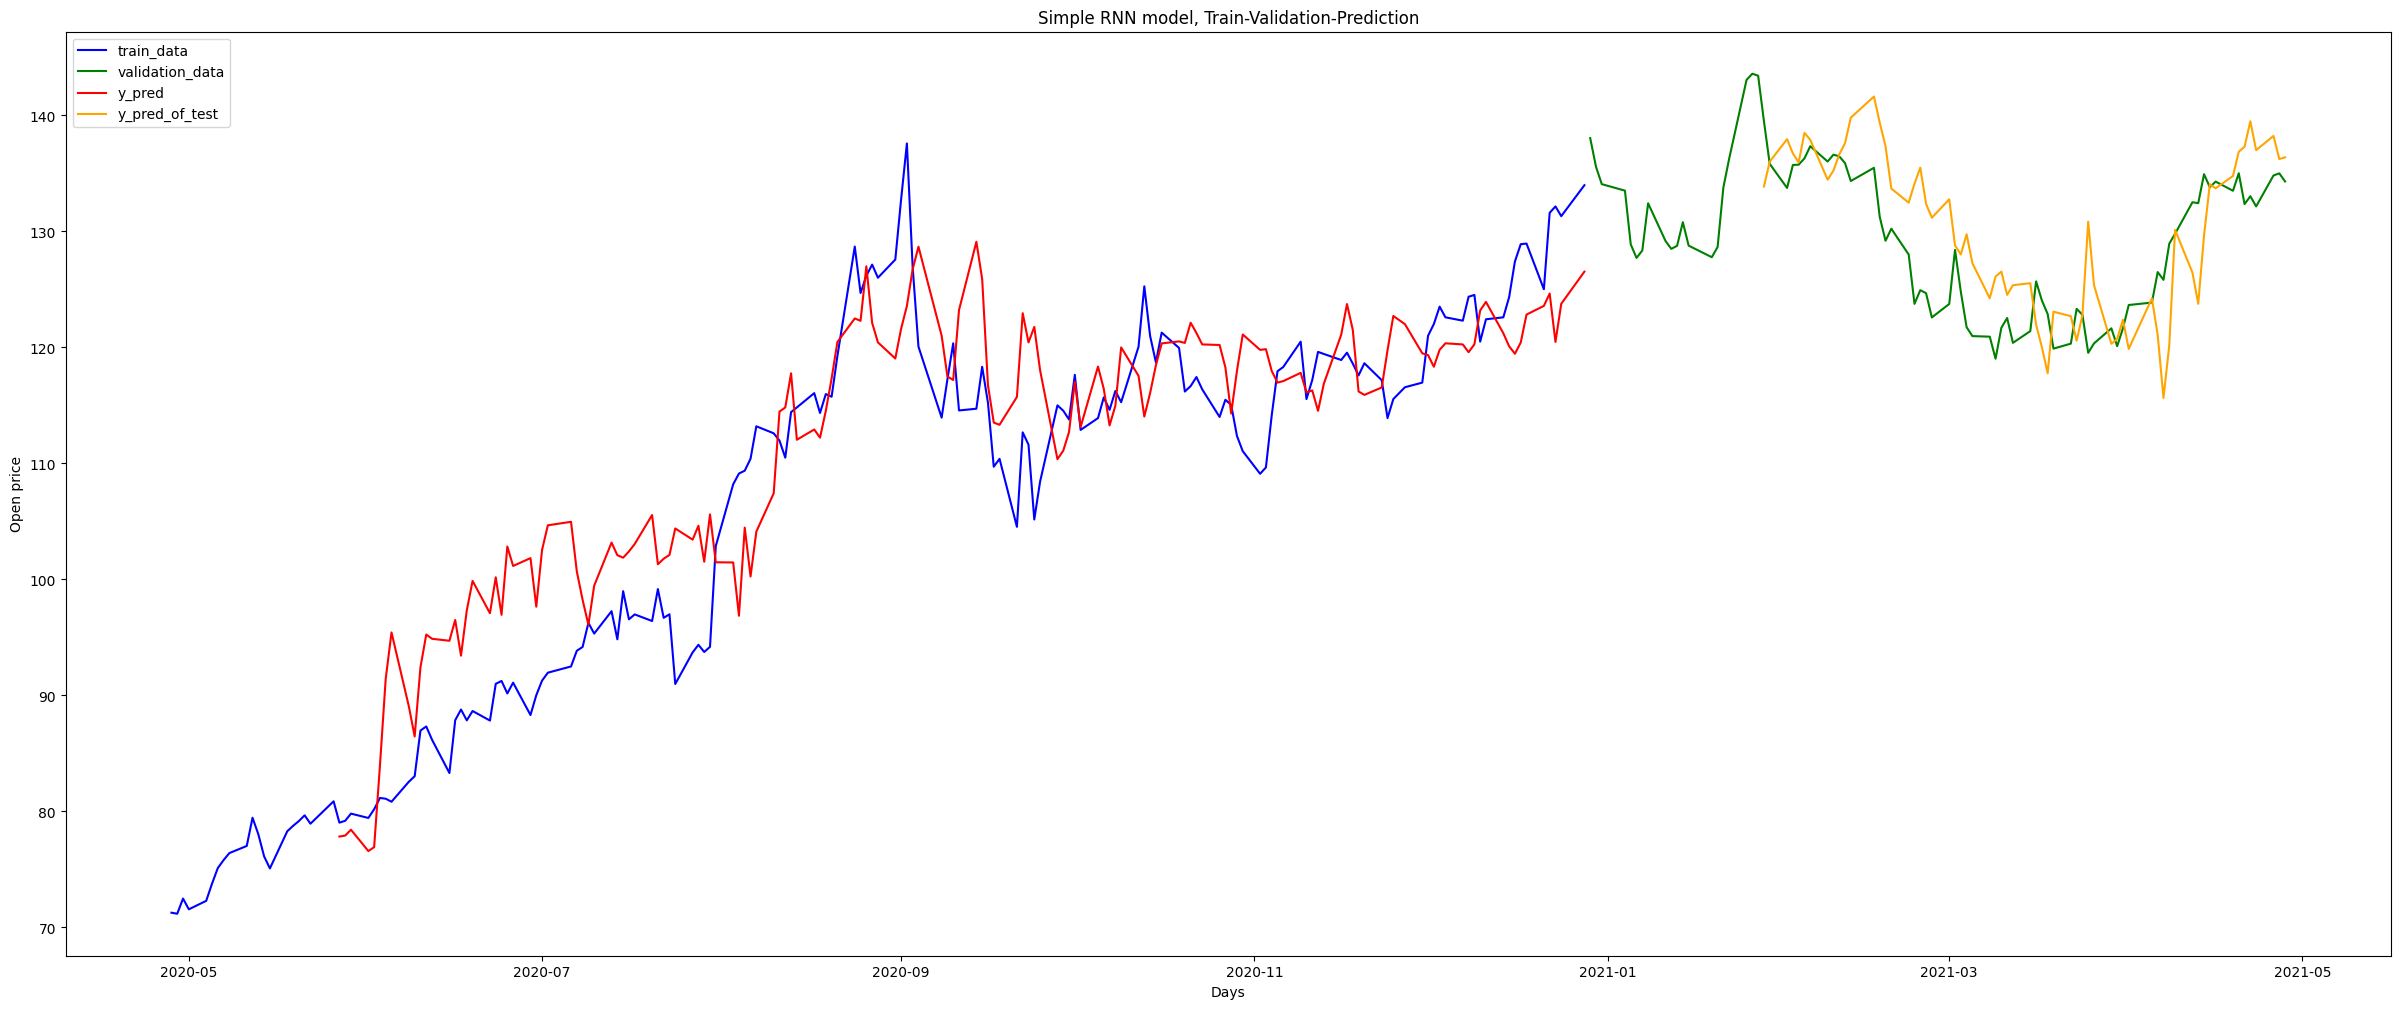

In [54]:
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[pred_days:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[pred_days:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [55]:
y_train = scaler.fit_transform(y_train)

In [56]:
model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
15/15 [==============================] - 4s 15ms/step - loss: 0.0907 - accuracy: 0.0133
Epoch 2/10
15/15 [==============================] - 0s 15ms/step - loss: 0.0216 - accuracy: 0.0133
Epoch 3/10
15/15 [==============================] - 0s 14ms/step - loss: 0.0139 - accuracy: 0.0133
Epoch 4/10
15/15 [==============================] - 0s 14ms/step - loss: 0.0100 - accuracy: 0.0133
Epoch 5/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0097 - accuracy: 0.0133
Epoch 6/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0089 - accuracy: 0.0133
Epoch 7/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0085 - accuracy: 0.0133
Epoch 8/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0088 - accuracy: 0.0133
Epoch 9/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0083 - accuracy: 0.0133
Epoch 10/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0080 - accuracy: 0.0133


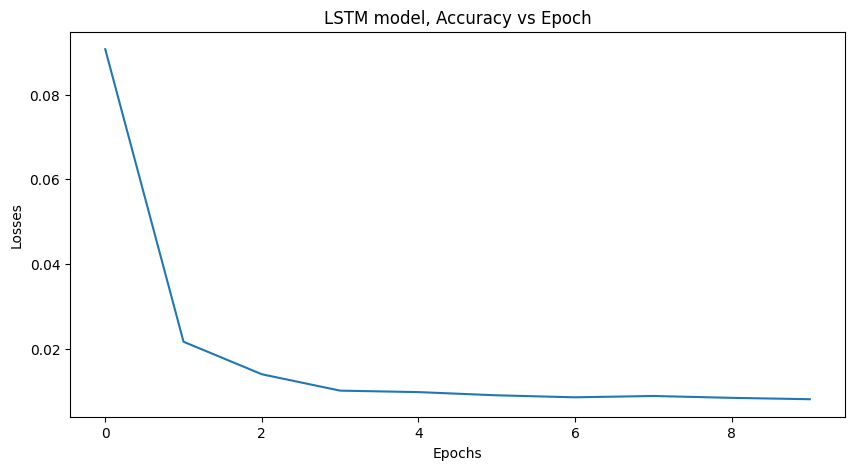

In [57]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

2/2 [==============================] - 1s 11ms/step


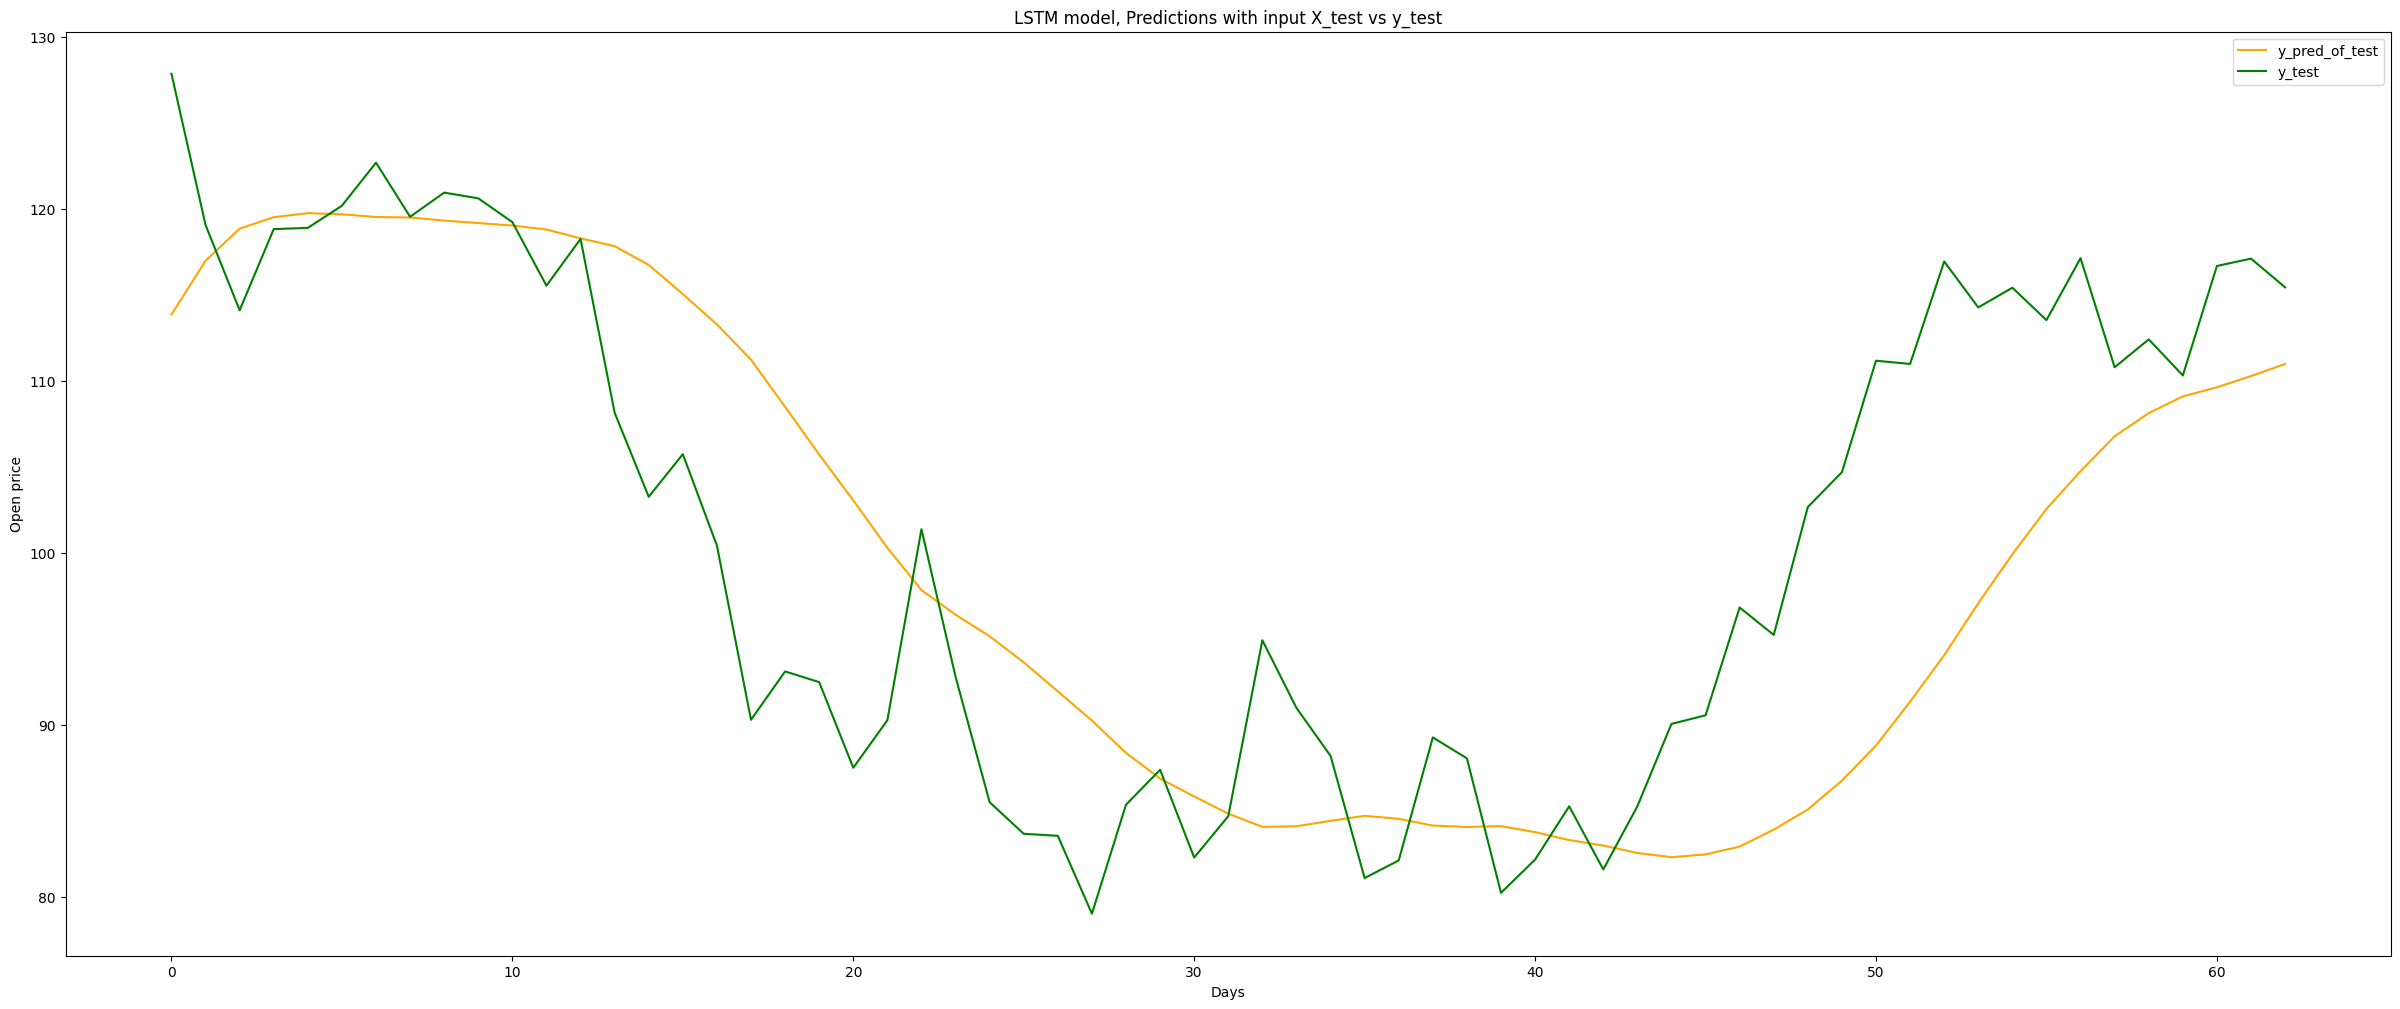

In [58]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [59]:
data.iloc[-1]

Date         2021-04-28
Open         134.309998
High         135.020004
Low          133.089905
Close        133.850006
Adj Close    133.850006
Volume         58080362
Name: 252, dtype: object

In [60]:
X_input = data.iloc[-pred_days:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,20,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 20, 1)


array([[[0.        ],
        [0.1503367 ],
        [0.16604343],
        [0.36275223],
        [0.31264019],
        [0.54599805],
        [0.60957366],
        [0.81301424],
        [0.80703054],
        [0.99401631],
        [0.91024706],
        [0.94614803],
        [0.88705993],
        [1.        ],
        [0.80104693],
        [0.85190645],
        [0.78608829],
        [0.98578893],
        [0.99925138],
        [0.9468956 ]]])

In [61]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 19ms/step
Simple RNN, Open price prediction : 131.58415
LSTM prediction, Open price prediction : 132.98866


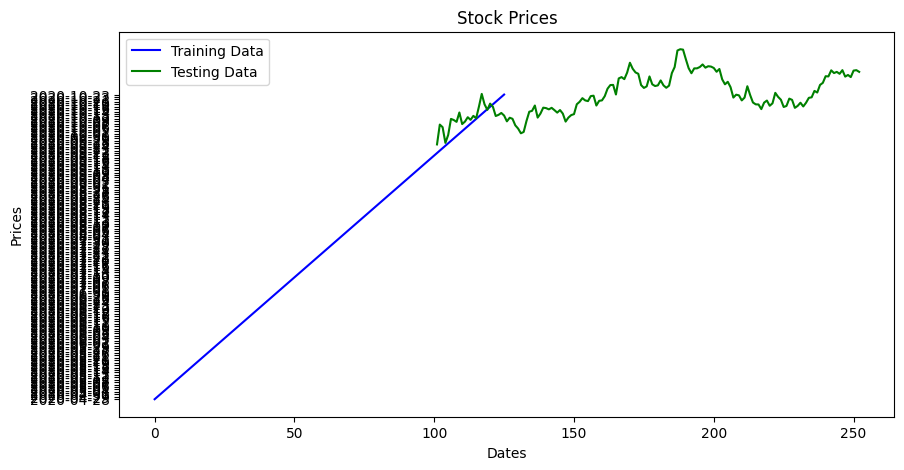

In [62]:
train_data, test_data = data[0:int(len(data)*0.5)], data[int(len(data)*0.4):]
plt.figure(figsize=(10,5))
plt.title('Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Date'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.legend()

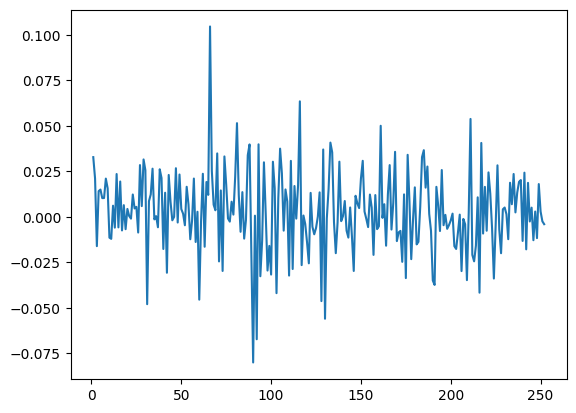

In [63]:
data['ret']=0
data['ret']=(data.Close-data.Close.shift(1))/data.Close.shift(1)
plt.plot(data.ret)

In [64]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
def stationarity(df):
    import statsmodels.api as sm
    acf_p=acf(data.ret, nlags=10)
    pacf_p=pacf(data.ret, nlags=10)
    f, ax = plt.subplots(2, 2, sharey=True, figsize=(17,6))
    ax[0,0].plot(df)
    ax[0,0].set_title('Sharing Y axis')

    ax[0,1].plot(acf_p)
    ax[0,1].axhline(y=0, linestyle='--', color='gray')
    ax[0,1].axhline(y=1.96/(np.sqrt(len(df))), linestyle='--', color='gray')
    ax[0,1].axhline(y=-1.96/(np.sqrt(len(df))), linestyle='--', color='gray')
    ax[0,1].axhline(y=0, linestyle='--', color='gray')
    ax[0,1].set_title(str('ACF plot'))

    ax[1,0].plot(pacf_p)
    ax[1,0].axhline(y=0, linestyle='--', color='gray')
    ax[1,0].axhline(y=1.96/(np.sqrt(len(df))), linestyle='--', color='gray')
    ax[1,0].axhline(y=-1.96/(np.sqrt(len(df))), linestyle='--', color='gray')
    ax[1,0].axhline(y=0, linestyle='--', color='gray')
    ax[1,0].set_title(str('PACF plot'))


    sm.qqplot(data.ret, line='s', ax=ax[1,1])
    ax[1,1].set_title(str('QQ plot'))

    rs=adfuller(df)
    print (rs)

    plt.show()


In [65]:
data.ret.dropna(inplace=True)


In [75]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf

<ipython-input-76-668015b79b32>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


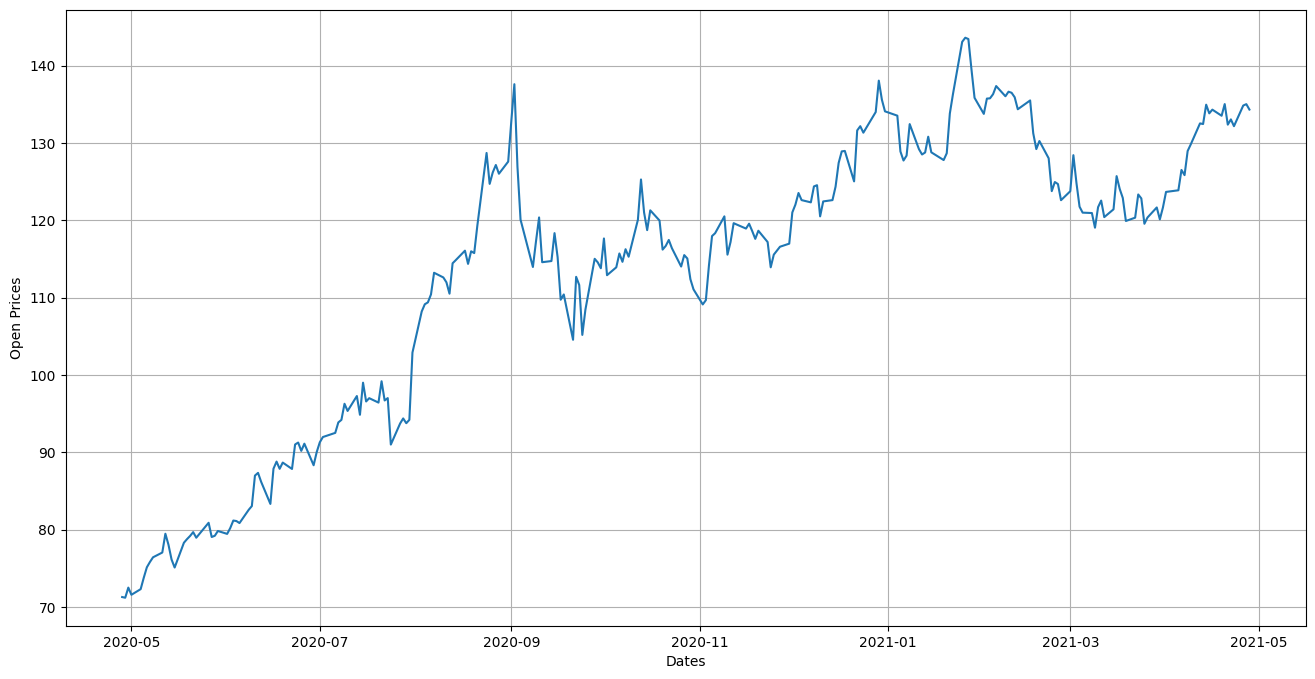

In [76]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('/content/AAPL.csv', sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'])

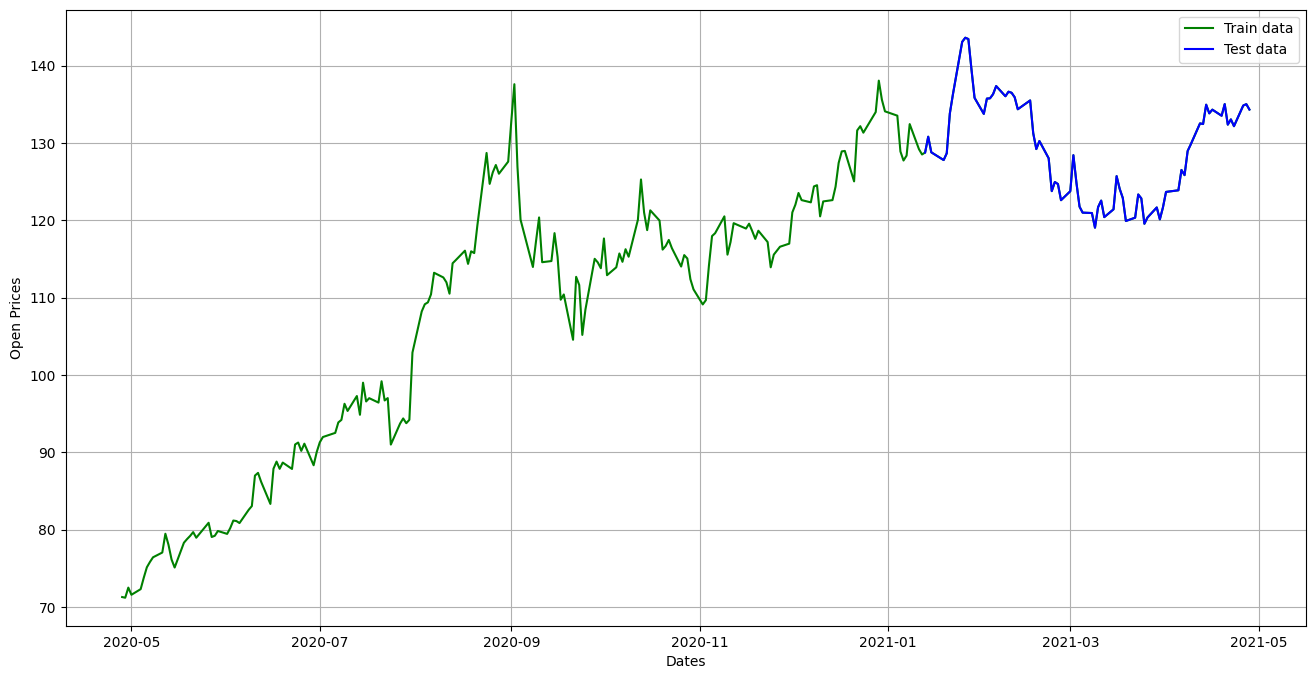

In [77]:
train_data, test_data = data[0:-73], data[-73:]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'].tail(600), 'green', label='Train data')
plt.plot(test_data['Open'], 'blue', label='Test data')
plt.legend()

In [78]:
values = DataFrame(data['Open'].values)
dataframe = concat([values.shift(1),values.shift(5),values.shift(10),values.shift(30), values], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result = dataframe.corr()
print(result)

             t       t+1       t+5      t+10      t+30
t     1.000000  0.963177  0.921673  0.777750  0.989307
t+1   0.963177  1.000000  0.952804  0.796677  0.953944
t+5   0.921673  0.952804  1.000000  0.836911  0.912194
t+10  0.777750  0.796677  0.836911  1.000000  0.773994
t+30  0.989307  0.953944  0.912194  0.773994  1.000000


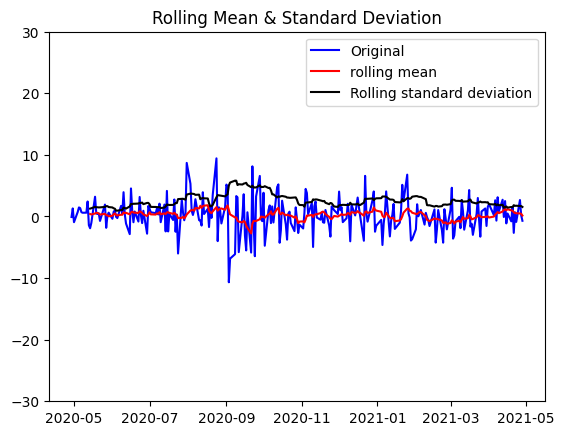

Results of Dickey-Fuller Test:
Test Statistic                -1.296317e+01
p-value                        3.193645e-24
#Lags Used                     1.000000e+00
Number of Observations Used    2.500000e+02
Critical value (1%)           -3.456781e+00
Critical value (5%)           -2.873172e+00
Critical value (10%)          -2.572969e+00
dtype: float64


In [72]:
def test_stationarity(timeseries):
    rolmean = pd.Series.rolling(timeseries,window=12).mean()
    rolstd = pd.Series.rolling(timeseries, window=12).std()
    fig = plt.figure()
    fig.add_subplot()
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean , color = 'red',label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label= 'Rolling standard deviation')
    plt.ylim([-30,30])
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)
ts_log = data['Open']
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

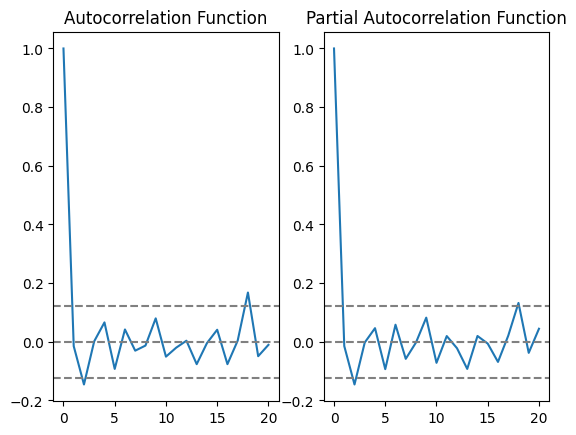

In [73]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

In [107]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.0 MB/s eta 0:00:00


In [108]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pmdarima as pm

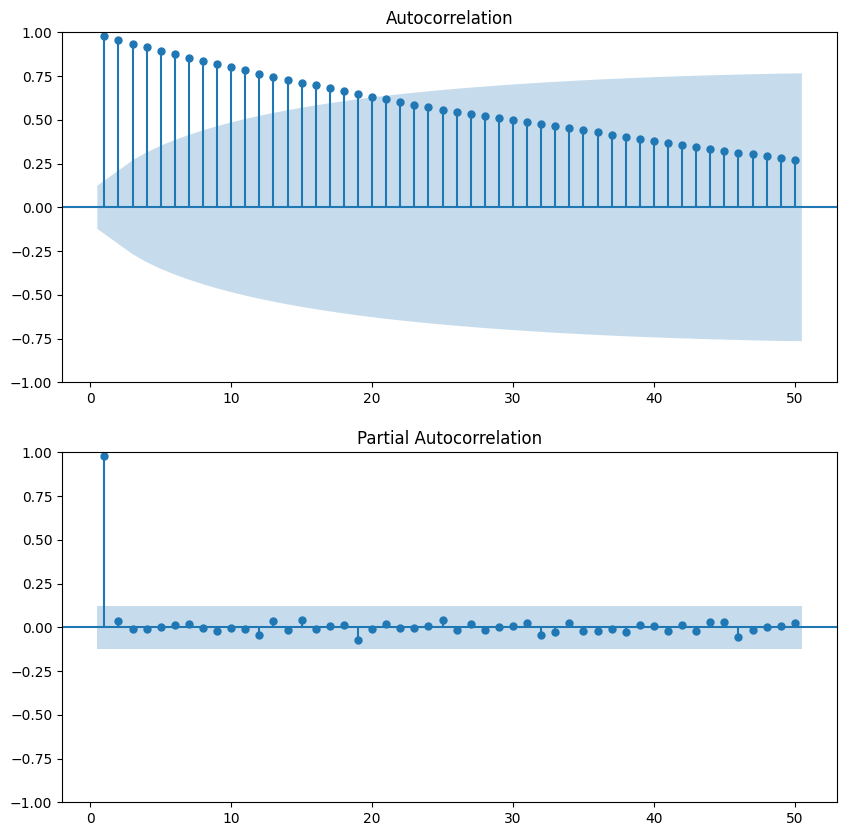

In [90]:
def plot_acf_pacf(df):
    # Create figure
    fig, ax = plt.subplots(2, figsize=(10,10))
    # Make ACF plot
    plot_acf(df, lags=50, zero=False, ax=ax[0])
    # Make PACF plot
    plot_pacf(df, lags=50, zero=False, ax=ax[1])
    # Show plots
    return plt.show()

plot_acf_pacf(df['Close'])

ADF Statistic: -16.916332
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


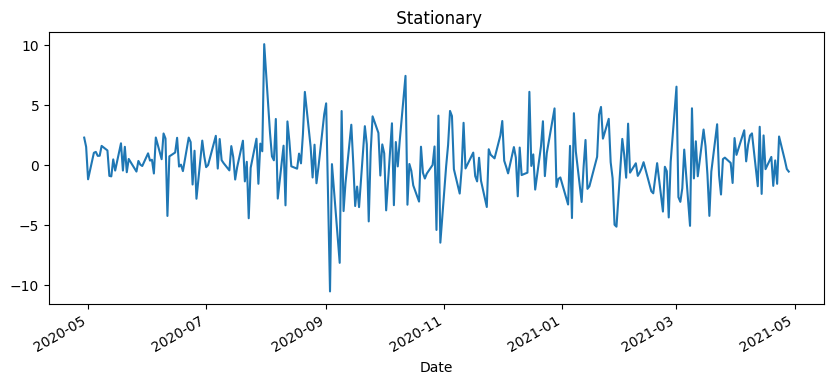

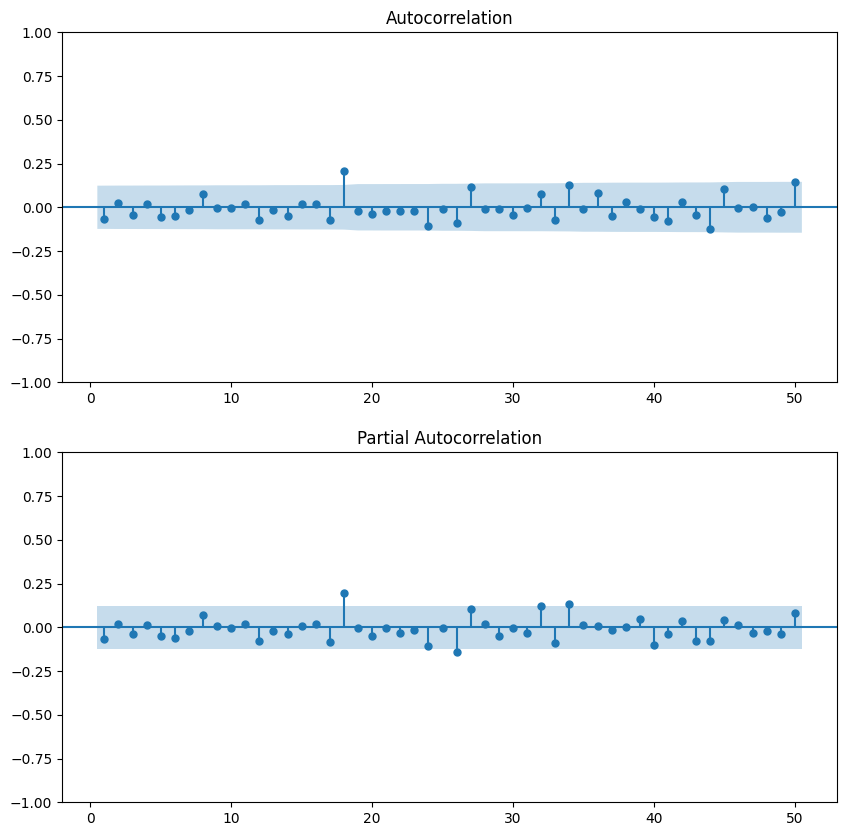

In [91]:
X = data.Close
# Method 1: difference data
stationary = X.diff(1)
# # Method 2: take the log
# stationary = np.log(X)
# # Method 3: take the square root
# stationary = np.sqrt(X)
# # Method 4: take the proprtional change
# stationary = X.pct_change(1)
stationary.dropna(axis=0, inplace=True)

# The augmented Dicky-Fuller test - check if stationary
result = adfuller(stationary)
# test statistic - more negative means more likely to be stationary
print('ADF Statistic: %f' % result[0])
# p-value - reject null hypothesis: non-stationary
print('p-value: %f' % result[1])
# critical test statistics - p-values: test statistic for null hypothesis
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# plot stationary dataset
stationary.plot(figsize=(10,4))
plt.title(' Stationary')
plt.show()

# plot ACF & PACF of stationary dataset
plot_acf_pacf(stationary)

In [109]:
class Auto_Arima():
    def __init__(self, df, start_p=1, start_q=1, max_p=10, max_q=10,\
        seasonal=False, information_criterion='aic'):
        self.df = df
        self.start_p = start_p
        self.start_q = start_q
        self.max_p = max_p
        self.max_q = max_q
        self.seasonal = seasonal
        self.information_criterion = information_criterion

    def arima_results(self):
        results = pm.auto_arima(
            self.df,
            start_p = self.start_p,
            start_q = self.start_q,
            max_p = self.max_p,
            max_q = self.max_q,
            seasonal = self.seasonal,
            # m = 14,
            # D = 1,
            # start_P = 1,
            # start_Q = 1,
            # max_P = 10,
            # max_Q = 10,
            information_criterion = self.information_criterion,
            trace = False,
            error_action = 'ignore',
            suppress_warnings=True,
            stepwise = True,
            scoring = 'mse'
        )
        return results


Train: 177, Test: 76


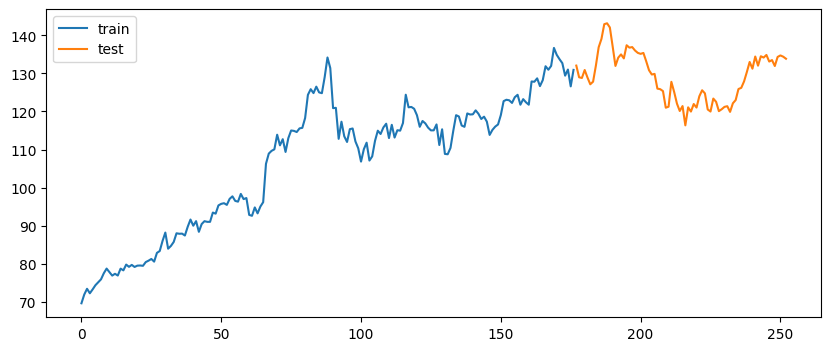

In [110]:
def train_test_split(X, size=0.7):
    train = X[:int(X.shape[0]*size)]
    test = X[int(X.shape[0]*size):]
    return train, test

train, test = train_test_split(X=df['Close'], size=0.7)
print(f'Train: {len(train)}, Test: {len(test)}')

# Plot train & test datasets
fig, ax = plt.subplots(figsize=(10,4))
train.plot(ax=ax, label='train')
test.plot(ax=ax, label='test')
ax.legend()
plt.show()

In [111]:
arima_model = Auto_Arima(train)
results = arima_model.arima_results()

In [112]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  177
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -417.304
Date:                Wed, 22 Nov 2023   AIC                            838.609
Time:                        07:19:52   BIC                            844.950
Sample:                             0   HQIC                           841.181
                                - 177                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3482      0.197      1.764      0.078      -0.039       0.735
sigma2         6.7142      0.476     14.116      0.000       5.782       7.646
Ljung-Box (L1) (Q):                   1.92   Jarque-

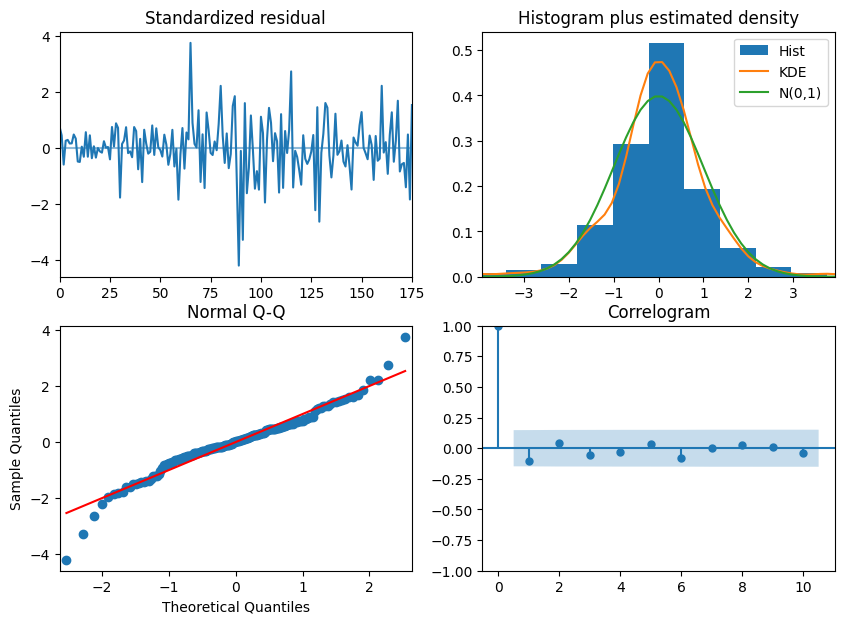

In [113]:
plot_diag = results.plot_diagnostics(figsize=(10,7))

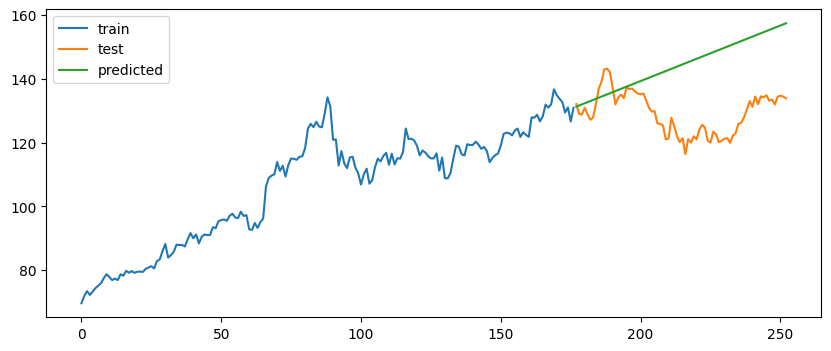

RMSE: 18.82


In [114]:
predicted = results.predict(n_periods=len(test))
predicted = pd.DataFrame(predicted, index=test.index, columns=['predicted'])

def plot_train_test(train, test, df):
    # Plot the predictions for validation set
    plt.figure(figsize=(10,4))
    plt.plot(train, label='train')
    plt.plot(test, label='test')
    plt.plot(df, label='predicted')
    plt.legend()
    plt.show()

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(test, df))
    print(f'RMSE: {rmse:.2f}')

plot_train_test(train, test, predicted)

In [115]:
def one_step_forecast():
    predicted, conf_int = results.predict(n_periods=1, return_conf_int=True)
    return (
        predicted.tolist()[0],
        np.asarray(conf_int).tolist()[0])

predictions = []
confidence_intervals = []

for x in test:
    predicted, conf = one_step_forecast()
    predictions.append(predicted)
    confidence_intervals.append(conf)

    # Updates the existing model
    results.update(x)

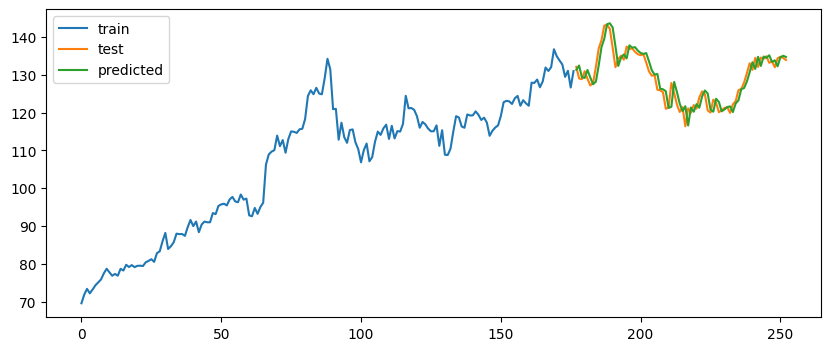

RMSE: 2.42


In [116]:
predicted = pd.DataFrame(predictions, index=test.index, columns=['predicted'])

# Plot real price vs one-step-forecast
plot_train_test(train, test, predicted)

# calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))

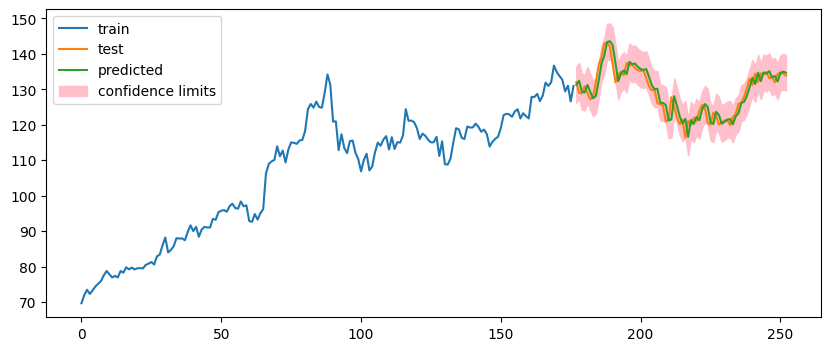

In [117]:
lower_limits = [row[0] for row in confidence_intervals]
upper_limits = [row[1] for row in confidence_intervals]
# Plot predictions with conf_int
plt.figure(figsize=(10,4))
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(predicted, label='predicted')
plt.fill_between(test.index, lower_limits,
		 upper_limits, color='pink', label='confidence limits')
plt.legend()
plt.show()

In [119]:
def sarimax_model(df, trend='ct', steps=100, dynamic=False):
    model = SARIMAX(df, order=(7,1,7), trend=trend)
    results = model.fit()
    one_step_forecast = results.get_prediction(start=-steps, dynamic=dynamic)
    # Get in-sample predicted mean values
    predictions = one_step_forecast.predicted_mean
    # Get confidence intervals of in-sample forecasts
    confidence_intervals = one_step_forecast.conf_int()
    lower_limits = confidence_intervals['lower Close']
    upper_limits = confidence_intervals['upper Close']
    return predictions, lower_limits, upper_limits

In [122]:
%%capture
predictions, lower_limits, upper_limits =\
    sarimax_model(df=test, trend='ct', steps=20, dynamic=False)

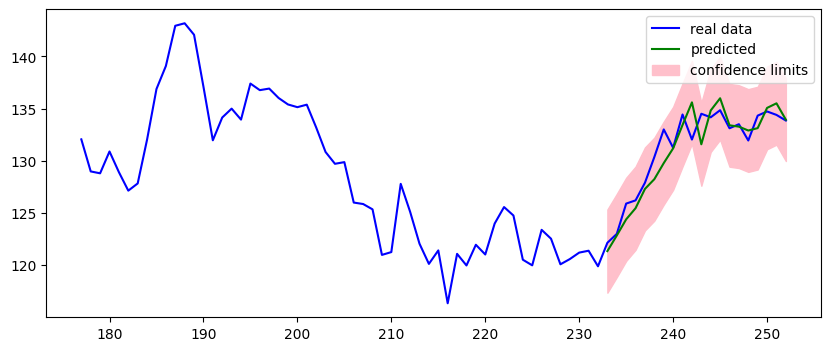

In [123]:
def plot_sarimax_pred(df, steps=100):
    plt.figure(figsize=(10,4))
    plt.plot(df.index[-steps:], df[-steps:],
            color='b', label='real data')
    # Plot predictions
    plt.plot(predictions.index, predictions,
            color='g', label='predicted')
    # Plot confidence limits
    plt.fill_between(lower_limits.index, lower_limits,
            upper_limits, color='pink', label='confidence limits')
    plt.legend()
    plt.show()

plot_sarimax_pred(df=test, steps=100)

In [124]:
predictions, lower_limits, upper_limits =\
    sarimax_model(df=df['Close'], trend='ct', steps=20, dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


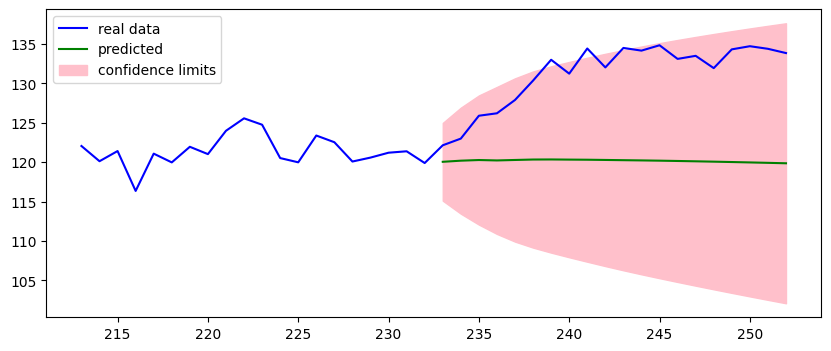

In [125]:
plot_sarimax_pred(df=df['Close'], steps=40)

In [126]:
predictions, lower_limits, upper_limits =\
    sarimax_model(df=df['Close'], trend='ct', steps=50, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


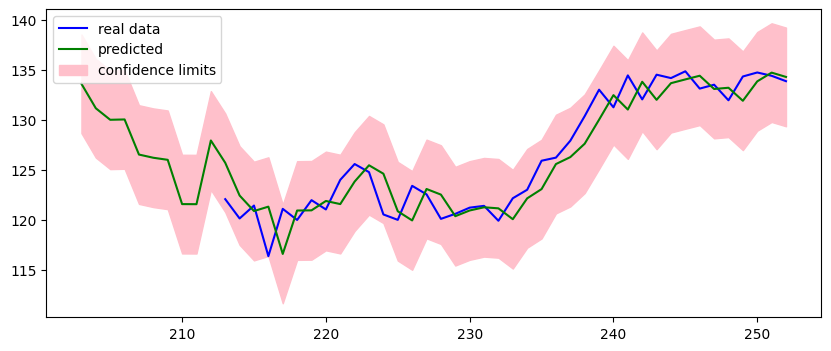

In [127]:
plot_sarimax_pred(df=df['Close'], steps=40)

In [128]:
forecast_vs_real = pd.concat([round(df['Close'][-50:],2), round(predictions,2)], axis=1)
forecast_vs_real.columns = ['Real Price', 'Forecast']
forecast_vs_real['Error_%'] = round(abs(forecast_vs_real['Forecast'] - forecast_vs_real['Real Price'])/\
                        forecast_vs_real['Real Price'] * 100, 1)
print(forecast_vs_real.head(5))
print()
print(f"Mean error: {round(forecast_vs_real['Error_%'].mean(),1)} %")

     Real Price  Forecast  Error_%
203      130.84    133.59      2.1
204      129.71    131.14      1.1
205      129.87    129.99      0.1
206      126.00    130.03      3.2
207      125.86    126.52      0.5

Mean error: 1.5 %


Train: 177, Test: 76


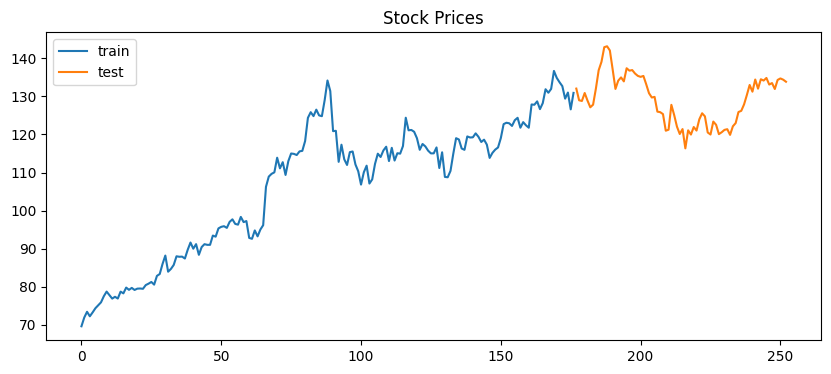

In [129]:
def train_test_split(X, size=0.7):
    train = X[:int(X.shape[0]*size)]
    test = X[int(X.shape[0]*size):]
    return train, test

train, test = train_test_split(X=df['Close'], size=0.7)
print(f'Train: {len(train)}, Test: {len(test)}')

# Plot train & test datasets
fig, ax = plt.subplots(figsize=(10,4))
train.plot(ax=ax, label='train')
test.plot(ax=ax, label='test')
plt.title('Stock Prices')
ax.legend(loc = 'upper left')
plt.show()

In [130]:
def returns_vol(df, column):
    # Calculate returns as percentage of price changes
    df['Returns'] = df[column].pct_change()*100
    # Calculate daily std of returns
    volatility = df['Returns'].std()
    df.dropna(inplace=True)
    return df, volatility

df, volatility = returns_vol(df, column='Close')

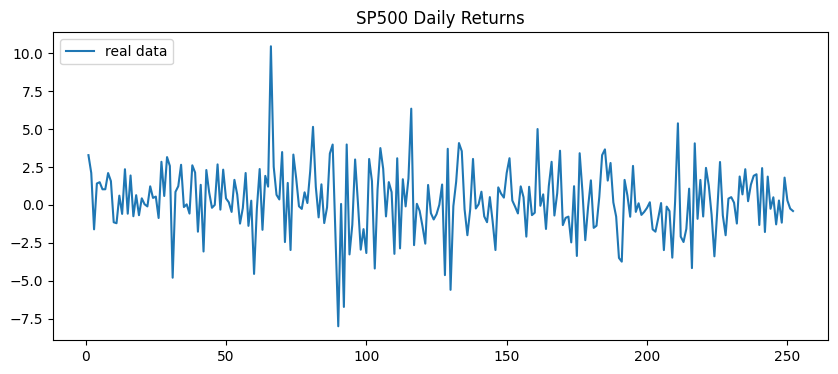

Daily volatility: 2.21% 
Monthly volatility: 10.13% 
Annual volatility: 35.09% 


In [131]:
plt.figure(figsize=(10,4))
plt.plot(df['Returns'], label='real data')
plt.title('SP500 Daily Returns')
plt.legend(loc = 'upper left')
plt.show()

# Print volatility
print(f'''Daily volatility: {volatility:.2f}%
Monthly volatility: {np.sqrt(21)*volatility:.2f}%
Annual volatility: {np.sqrt(252)*volatility:.2f}% ''')

In [136]:
def garch_model(df, p=1, o=0, q=1, mean='constant', vol = 'GARCH',
                dist='normal'):
    model = arch_model(
        df,
        p = p, o=o, q = q,
        mean = mean,
        vol = vol,
        dist = dist
    )
    return model

In [137]:
basic_gm = garch_model(df['Returns'])
# Fit the model
gm_result = basic_gm.fit(disp='off', show_warning=False)

# Display model fitting summary
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -553.112
Distribution:                  Normal   AIC:                           1114.22
Method:            Maximum Likelihood   BIC:                           1128.34
                                        No. Observations:                  252
Date:                Wed, Nov 22 2023   Df Residuals:                      251
Time:                        07:31:30   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3215      0.136      2.360  1.829e-02 [5.446e-0

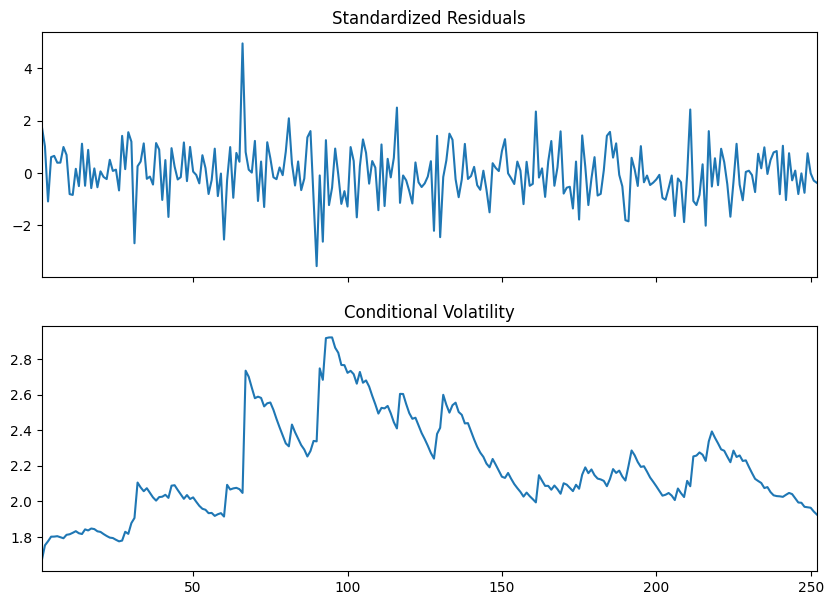

In [138]:
plt.rc("figure", figsize=(10, 7))
gm_result.plot()
plt.show()

In [139]:
gm_resid = gm_result.resid
# Predicted price volatility (std)
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid / gm_std

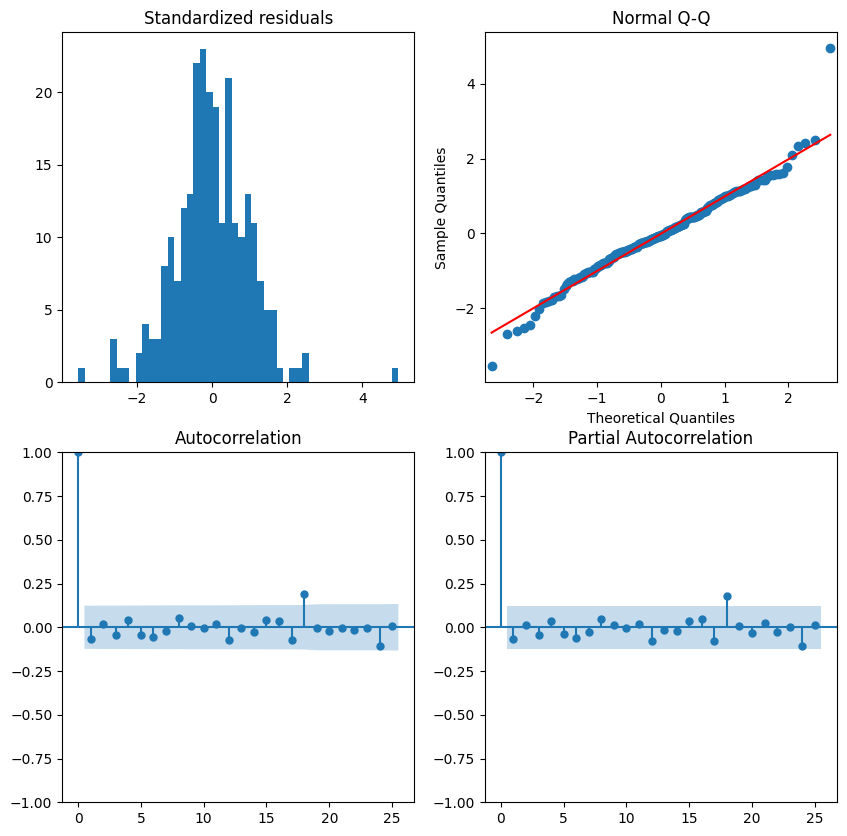

In [140]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1.hist(gm_std_resid, bins = 50)
ax1.set_title('Standardized residuals')
qqplot(gm_std_resid, line='s', ax=ax2)
ax2.set_title('Normal Q-Q')
plot_acf(gm_std_resid, ax=ax3)
plot_pacf(gm_std_resid, ax=ax4)
plt.show()

In [141]:
gjr_gm = garch_model(df['Returns'], o=1, dist = 'skewt')

# Fit the model
gjr_result = gjr_gm.fit(disp='off', show_warning=False)

# Get model estimated volatility
gjr_vol = gjr_result.conditional_volatility

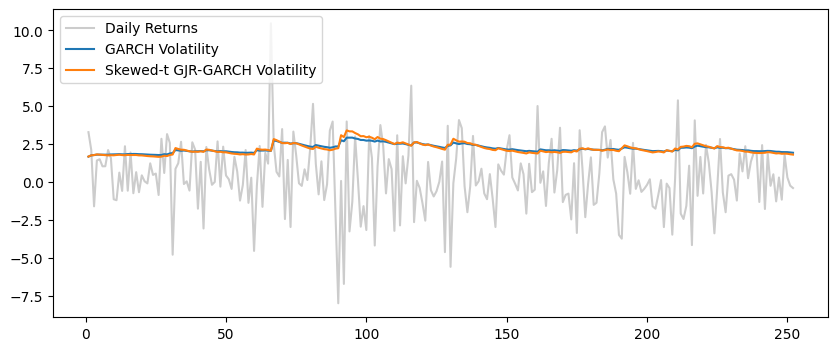

Correlation coef between GARCH & skewed-t GJR=GARCH: 0.97


In [142]:
plt.rc("figure", figsize=(10, 4))
gm_vol = gm_result.conditional_volatility
plt.plot(df['Returns'], color = 'grey',
         label = 'Daily Returns', alpha = 0.4)
plt.plot(gm_vol, label = 'GARCH Volatility')
plt.plot(gjr_vol, label = 'Skewed-t GJR-GARCH Volatility')
plt.legend(loc = 'upper left')
plt.show()
print(f'Correlation coef between GARCH & skewed-t GJR=GARCH: {round(np.corrcoef(gm_vol, gjr_vol)[0,1],2)}')

In [149]:
index = df.index
end_loc = 20
forecasts = {}
for i in range(50):
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(last_obs = i + end_loc,
                             disp='off', show_warning=False)
    # Conduct 1-period variance forecast and save the result
    temp_result = gm_result.forecast(horizon = 1).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast
# Save all forecast to a dataframe
forecast_var = pd.DataFrame(forecasts).T

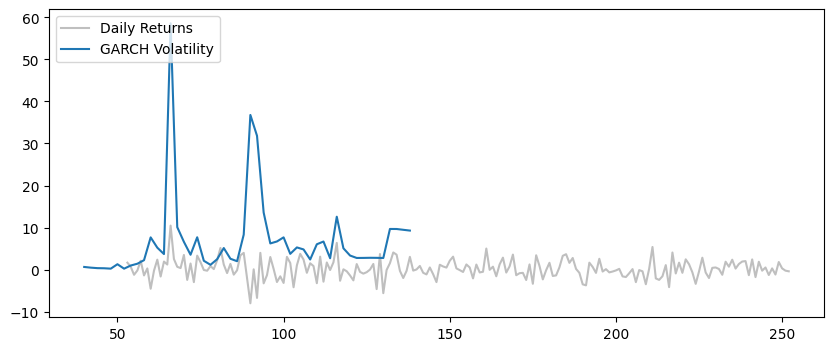

In [156]:
# Plot in-sample forecast and real volatility
plt.plot(df.Returns[-200:], color = 'grey',
         label = 'Daily Returns', alpha = 0.5)
plt.plot(forecast_var, label = 'GARCH Volatility')
plt.legend(loc = 'upper left')
plt.show()

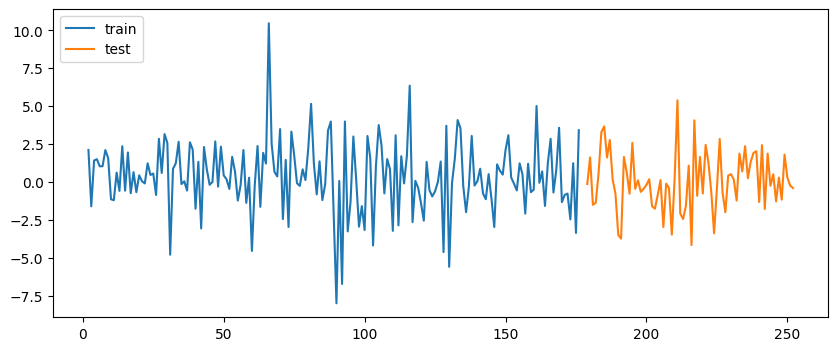

In [158]:
test = pd.DataFrame(test)
train = pd.DataFrame(train)
train, _ = returns_vol(train, column='Close')
test, _ = returns_vol(test, column='Close')

# Plot train & test returns
fig, ax = plt.subplots(figsize=(10,4))
train['Returns'].plot(ax=ax, label='train')
test['Returns'].plot(ax=ax, label='test')
ax.legend(loc = 'upper left')
plt.show()

In [159]:
rolling_predictions = []
for i in range(test.shape[0]):
    model = garch_model(train['Returns'], p=1, o=1, q=1)
    model_fit = model.fit(update_freq=1, disp='off')
    pred = model_fit.forecast(horizon=1)
    train = train.append(test.iloc[i])
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

<ipython-input-159-1bd13f4c7f84>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(test.iloc[i])
<ipython-input-159-1bd13f4c7f84>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(test.iloc[i])
<ipython-input-159-1bd13f4c7f84>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(test.iloc[i])
<ipython-input-159-1bd13f4c7f84>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(test.iloc[i])
<ipython-input-159-1bd13f4c7f84>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train

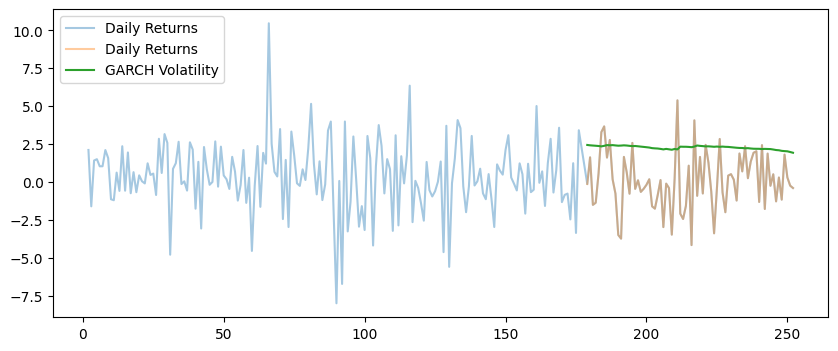

In [160]:
rolling_predictions = pd.DataFrame(rolling_predictions, index=test.index)
plt.plot(train['Returns'],
         label = 'Daily Returns', alpha = 0.4)
plt.plot(test['Returns'],
         label = 'Daily Returns', alpha = 0.4)
plt.plot(rolling_predictions,
         label = 'GARCH Volatility')
plt.legend(loc = 'upper left')
plt.show()

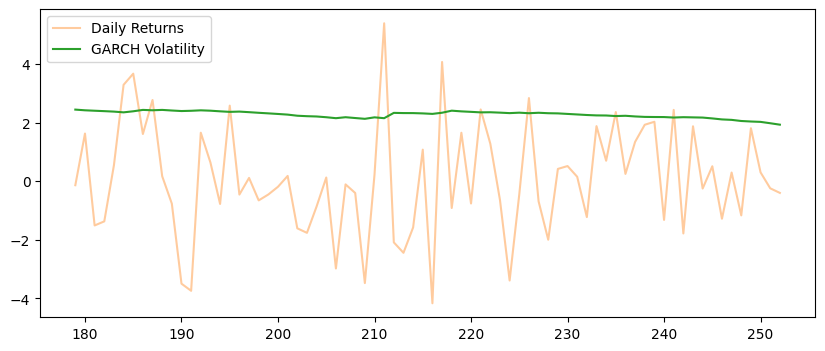

In [161]:
plt.plot(test['Returns'], color = 'C1',
         label = 'Daily Returns', alpha = 0.4)
plt.plot(rolling_predictions, color = 'C2',
         label = 'GARCH Volatility')
plt.legend(loc = 'upper left')
plt.show()